### Machine Learning Engineer Nanodegree

# Capstone Project

## Telstra Network Disruptions Project

## Notebook 1:  Data Exprolation

This is a project to build a model that predict a level of fault severity at a time and a location in thier network using log data.

The dataset for this project originally came from Kaggle's past competition page:

[Telstra Network Disruptions in Kaggle](https://www.kaggle.com/c/telstra-recruiting-network)


In this notebook, I read data files, and inspect and analyze the dataset to develop my understanding of data.

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# helper module for this project 
from telstra_helper import getint, read_tables

%matplotlib inline

In [2]:
# Show all columns in DataFrame
pd.options.display.max_columns=None

## 1. Read data 

Read csv files and load data into Pandas DataFrame. For each file, 5 rows from head is shown as an example as well as data types.  

In [3]:
files = read_tables()

data_main = files['train.csv']
log_feature = files['log_feature.csv']
severity_type = files['severity_type.csv']
event_type = files['event_type.csv']
resource_type = files['resource_type.csv']

----- train.csv -----


,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


id                 int64
location          object
fault_severity     int64
dtype: object


----- log_feature.csv -----


,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


id              int64
log_feature    object
volume          int64
dtype: object


----- severity_type.csv -----


,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


id                int64
severity_type    object
dtype: object


----- event_type.csv -----

event_type.csv :Number of wrong rows = 1, positions = [31171]



,id,event_type,event_flag
1,6597,event_type 11,NaN
2,8011,event_type 15,NaN
3,2597,event_type 15,NaN
4,5022,event_type 15,NaN
5,5022,event_type 11,NaN


id              int64
event_type     object
event_flag    float64
dtype: object


----- resource_type.csv -----

resource_type.csv: Number of wrong rows = 1, positions = [21077]



,id,resource_type,resource_flag
1,6597,resource_type 8,NaN
2,8011,resource_type 8,NaN
3,2597,resource_type 8,NaN
4,5022,resource_type 8,NaN
5,6852,resource_type 8,NaN


id                 int64
resource_type     object
resource_flag    float64
dtype: object

## 2. Get samples

Take a sample from each class(fault_severity) and observe the relationship between fault_severity and other features.

In [4]:
np.random.seed(6000)

# Take a sample randomly from each fault severity
group_fs = data_main.groupby('fault_severity').groups

sample_id = {}
for k in group_fs.keys():
    r_sample = np.random.choice(group_fs[k])
    sample_id[k] = data_main.loc[r_sample]['id']
    
    print("***** fault severity {} *****".format(k))
    print("id = {}".format(sample_id[k]))
    display(data_main.loc[data_main['id'] == sample_id[k]])
    display(event_type.loc[event_type['id'] == sample_id[k]])
    display(log_feature.loc[log_feature['id'] == sample_id[k]])
    display(severity_type.loc[severity_type['id'] == sample_id[k]])
    display(resource_type.loc[resource_type['id'] == sample_id[k]])
    print("\n")


***** fault severity 0 *****
id = 15637


,id,location,fault_severity
5712,15637,location 493,0


,id,event_type,event_flag
16027,15637,event_type 34,NaN
16028,15637,event_type 35,NaN


,id,log_feature,volume
30964,15637,feature 312,1
30965,15637,feature 232,1


,id,severity_type
9103,15637,severity_type 2


,id,resource_type,resource_flag
9839,15637,resource_type 2,NaN




***** fault severity 1 *****
id = 16866


,id,location,fault_severity
1699,16866,location 821,1


,id,event_type,event_flag
25214,16866,event_type 15,NaN


,id,log_feature,volume
47996,16866,feature 82,8
47997,16866,feature 71,4
47998,16866,feature 193,2
47999,16866,feature 203,3


,id,severity_type
14811,16866,severity_type 2


,id,resource_type,resource_flag
16756,16866,resource_type 8,NaN




***** fault severity 2 *****
id = 5928


,id,location,fault_severity
4824,5928,location 1008,2


,id,event_type,event_flag
395,5928,event_type 15,NaN
396,5928,event_type 11,NaN


,id,log_feature,volume
663,5928,feature 203,4
664,5928,feature 201,3
665,5928,feature 82,6
666,5928,feature 80,4


,id,severity_type
244,5928,severity_type 1


,id,resource_type,resource_flag
256,5928,resource_type 8,NaN


## 3. Data analyze

### 3.1 Class distribution

See how many data points are in each class (fault severity). **Is it balanced? Or imbalanced?**

In [5]:
# Use DataFrame.groupby().size()  <--- show the number of samples in each category
fss = data_main.groupby('fault_severity').size()
print(fss)

print("\nfault_severity 0 = {:2.2%}".format(fss[0]/data_main.shape[0]))
print("fault_severity 1 = {:2.2%}".format(fss[1]/data_main.shape[0]))
print("fault_severity 2 = {:2.2%}".format(fss[2]/data_main.shape[0]))
print("\nTotal number of samples = {}".format(data_main.shape[0]))

fault_severity
0    4784
1    1871
2     726
dtype: int64

fault_severity 0 = 64.82%
fault_severity 1 = 25.35%
fault_severity 2 = 9.84%

Total number of samples = 7381


### 3.2 Number of data points in each file

In [6]:
print("train.csv: Number of rows = {}".format(data_main.shape[0]))
print("log_feature.csv: Number of rows = {}".format(log_feature.shape[0]))
print("severity_type.csv: Number of rows = {}".format(severity_type.shape[0]))
print("event_type.csv: Number of rows = {}".format(event_type.shape[0]))
print("resource_type.csv: Number of rows = {}".format(resource_type.shape[0]))

train.csv: Number of rows = 7381
log_feature.csv: Number of rows = 58671
severity_type.csv: Number of rows = 18552
event_type.csv: Number of rows = 34082
resource_type.csv: Number of rows = 22876


### 3.3 How many types or categories in each feature?

Count the number of types in each feature. 

In [7]:
# Location
print("train.csv: id = {}, location = {}".format(len(data_main['id'].unique()),
                                                 len(data_main['location'].unique())))

# log_feature and volume
print("log_feature.csv: id = {}, log_feature = {}, volume = {}".format(len(log_feature['id'].unique()),
                                                                       len(log_feature['log_feature'].unique()),
                                                                       len(log_feature['volume'].unique())))

# severity_type
print("severity_type.csv: id = {}, severity_type = {}".format(len(severity_type['id'].unique()),
                                                              len(severity_type['severity_type'].unique())))

# event_type
print("event_type.csv: id = {}, event_type = {}".format(len(event_type['id'].unique()),
                                                        len(event_type['event_type'].unique())))

# resource_type
print("resource_type.csv: id = {}, resource_type = {}".format(len(resource_type['id'].unique()),
                                                              len(resource_type['resource_type'].unique())))


train.csv: id = 7381, location = 929
log_feature.csv: id = 18552, log_feature = 386, volume = 341
severity_type.csv: id = 18552, severity_type = 5
event_type.csv: id = 18552, event_type = 53
resource_type.csv: id = 18552, resource_type = 10


### 3.4 How many types in a feature belong to one id?

In [8]:
print("How many log_features and volumes for an id? : min = {}, max = {}".format(log_feature.groupby('id').size().min(),
                                                                                log_feature.groupby('id').size().max()))
print("How many severity_types for an id? : min = {}, max = {}".format(severity_type.groupby('id').size().min(),
                                                                       severity_type.groupby('id').size().max()))
print("How many event_types for an id? : min = {}, max = {}".format(event_type.groupby('id').size().min(),
                                                                    event_type.groupby('id').size().max()))
print("How many resource_types for an id? : min = {}, max = {}".format(resource_type.groupby('id').size().min(),
                                                                       resource_type.groupby('id').size().max()))


How many log_features and volumes for an id? : min = 1, max = 20
How many severity_types for an id? : min = 1, max = 1
How many event_types for an id? : min = 1, max = 20
How many resource_types for an id? : min = 1, max = 10


## 4. Visualization

### 4.1 Distribution of fault severity

In [9]:
# Set the color of count plot: fault_severity 0 = blue, 1 = green, 2 = red
current_palette = sns.color_palette()
cl = np.array(current_palette)
palette_fs = [cl[0], cl[2], cl[3]]

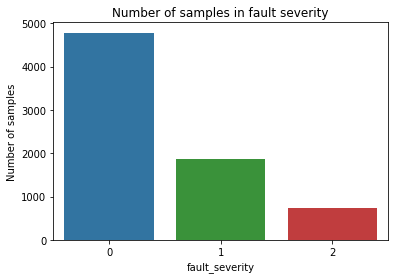

In [10]:
# Show contplot 
ax = sns.countplot(data_main['fault_severity'], order=[0, 1, 2], palette=palette_fs)
ax.set_ylabel("Number of samples")
ax.set_title("Number of samples in fault severity")

# Save image into file
plt.savefig("figures/dist_fault_severity.png")

plt.show()

### 4.2 Distribution of features

How many variations in features? How many data points are there in each features in training data?

In [11]:
def plot_featurecount(df, feature_name, tick=1, save=False):
    """ Show countplot for a specified feature. 
        If 'save' is specified, the plot is saved in a file.
    """
    
    feature = df[feature_name]
    
    if feature.dtypes == 'object':
        # sort features by number instead of by string
        f_order = sorted(feature.unique(), key=getint)
        xlabel = np.arange(0, len(f_order), tick)
        xt = [getint(f_order[i]) for i in xlabel]
        
    else:
        # sort features by number
        f_order = sorted(feature.unique())
        xlabel = np.arange(0, len(f_order), tick)
        xt = [f_order[i] for i in xlabel]
   
    # set plot size
    fig_width = 14 if len(f_order) > 10 else 6
    fig, ax = plt.subplots(1, 1, figsize=(fig_width, 5))
    
    # set countplot and labels
    ax = sns.countplot(feature, order=f_order)
    
    ax.set_xticks(xlabel)
    ax.set_xticklabels(xt)

    ax.set_ylabel("Number of samples")
    ax.set_xlabel("{} ({} to {}, with {} points)".format(feature_name, f_order[0], f_order[-1], len(f_order)))
    ax.set_title("Number of samples in each {}".format(feature_name))
    
    if save == True:
        # Save image into file
        plt.savefig("figures/dist_{}.png".format(feature_name))

    plt.show()
    

### 4.2.1 location

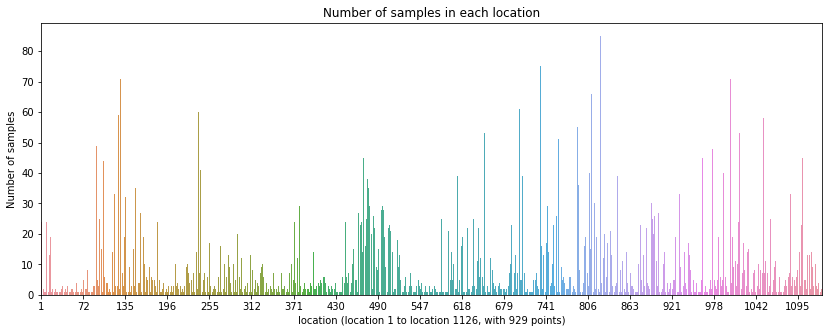

In [12]:
# location
plot_featurecount(data_main, 'location', tick=50, save=True)

### 4.2.2 log_feature and volume

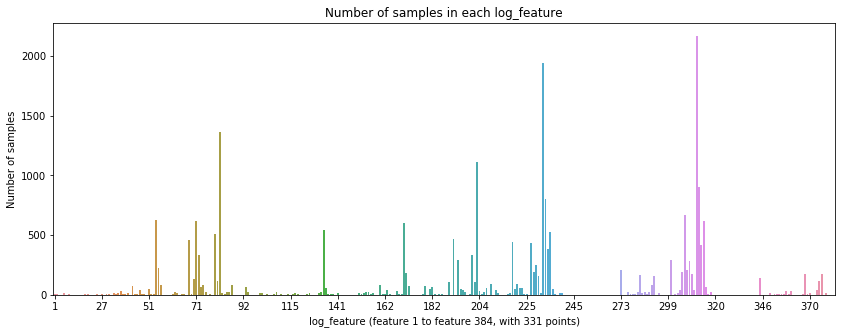

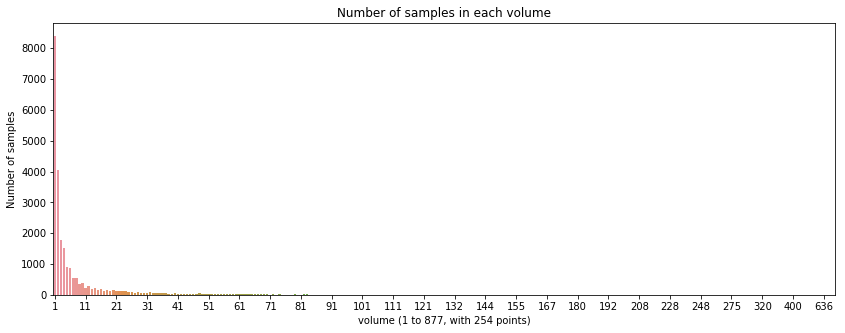

In [13]:
# Extract training data
lf_train = data_main.join(log_feature.set_index('id'), on='id')
# log_feature
plot_featurecount(lf_train, 'log_feature', tick=20)
#volume
plot_featurecount(lf_train, 'volume', tick=10, save=True)

#### Additional analysis for volume

In [14]:
print("Mean of volume = {}".format(lf_train['volume'].mean()))
print("Median of volume = {}".format(lf_train['volume'].median()))
print("volume 1 = {:2.2%}".format(len(lf_train.loc[lf_train['volume'] == 1])/lf_train.shape[0]))
print("volume 2 = {:2.2%}".format(len(lf_train.loc[lf_train['volume'] == 2])/lf_train.shape[0]))

Mean of volume = 9.847176219026457
Median of volume = 2.0
volume 1 = 35.22%
volume 2 = 16.93%


**Comment:** Most of data points are in volume = 1

### 4.2.3 severity_type

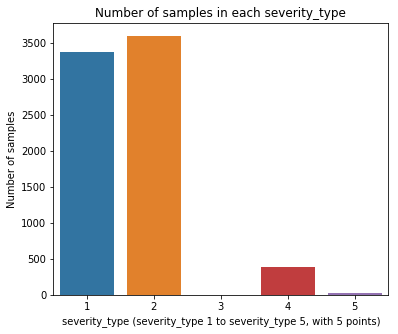

In [15]:
# Extract training data
st_train = data_main.join(severity_type.set_index('id'), on='id')
# severity_type
plot_featurecount(st_train, 'severity_type', tick=1)

### 4.2.4 event_type

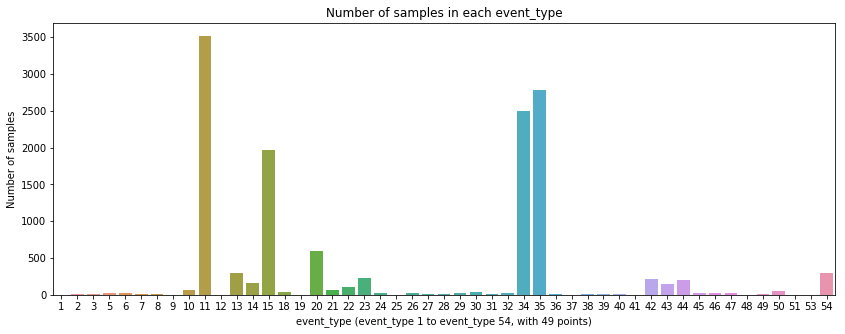

In [16]:
# Extract training data
et_train = data_main.join(event_type.set_index('id'), on='id')
# event_type
plot_featurecount(et_train, 'event_type', tick=1)

### 4.2.5 resource_type

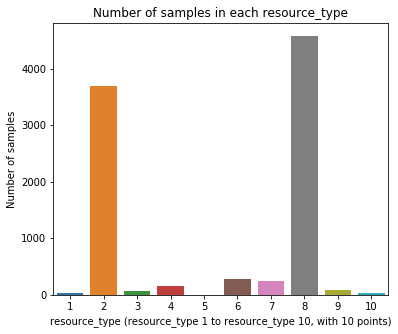

In [17]:
# Extract training data
rt_train = data_main.join(resource_type.set_index('id'), on='id')
# resource_type
plot_featurecount(rt_train, 'resource_type', tick=1)

## Additional examination

### Should the additional column be considered?

Should `event_flag` and `resource_flag` be considered to train the model?
I'll see the relationship between these flags and `fault_severity`. 

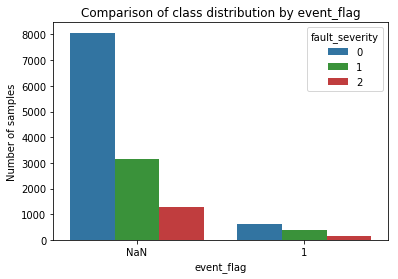

In [18]:
# event_flag

# transform NaN into 0 to be used in coutplot()
et_train['event_flag'] = et_train['event_flag'].fillna(0)

# plot the difference of class distribution between flag is NaN or 1
ax_e = sns.countplot(x='event_flag', hue='fault_severity', data=et_train, palette=palette_fs)
ax_e.set_xticklabels(['NaN', '1'])
ax_e.set_ylabel("Number of samples")
ax_e.set_title("Comparison of class distribution by event_flag")
plt.show()

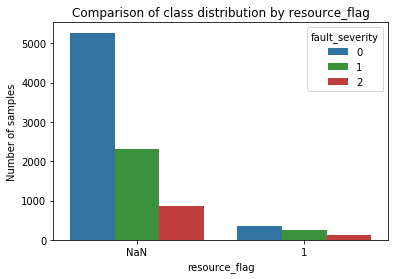

In [19]:
# resource_flag

# transform NaN into 0 to be used in coutplot()
rt_train['resource_flag'] = rt_train['resource_flag'].fillna(0)

# plot the difference of class distribution between flag is NaN or 1
ax_r = sns.countplot(x='resource_flag', hue='fault_severity', data=rt_train, palette=palette_fs)
ax_r.set_xticklabels(['NaN', '1'])
ax_r.set_ylabel("Number of samples")
ax_r.set_title("Comparison of class distribution by resource_flag")
plt.show()